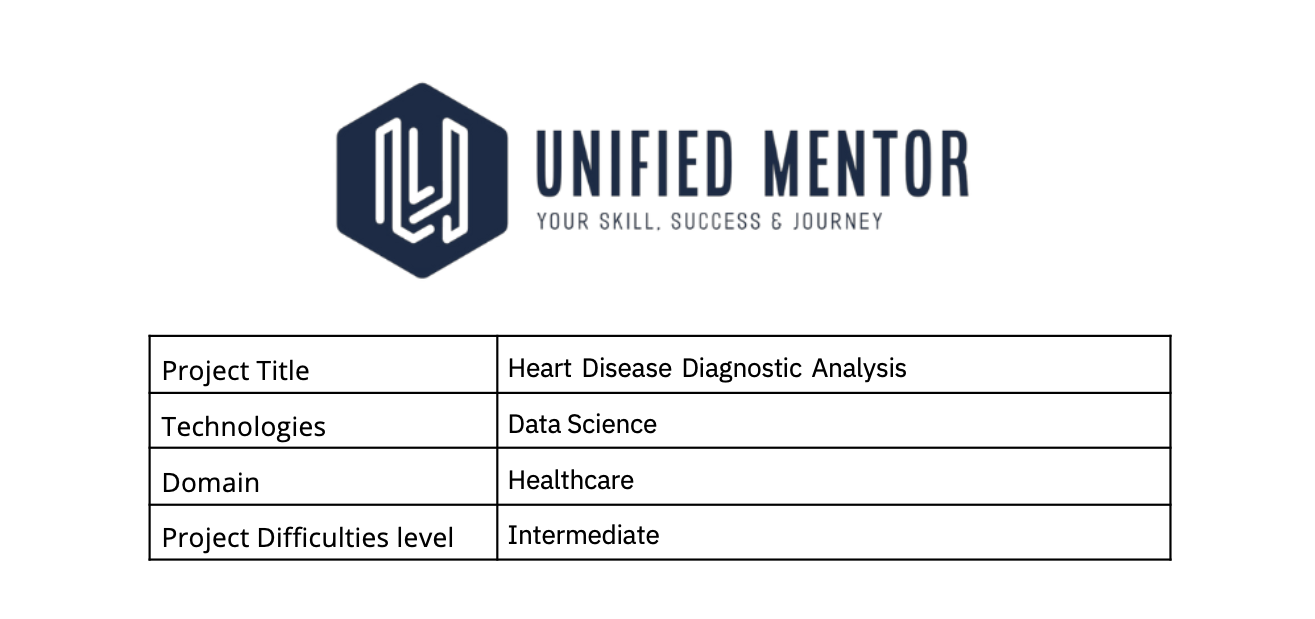

#PROBLEM STATEMENT

Health is real wealth in the pandemic time we all realized the brute effects of covid-19 on all
irrespective of any status. You are required to analyze this health and medical data for better
future preparation.

Do ETL: Extract- Transform and Load data from the heart disease diagnostic database

You can perform EDA through python. The database extracts various information such as
Heart disease rates, Heart disease by gender, by age.

You can even compare attributes of the data set to extract necessary information. Make the
necessary dashboard with the best you can extract from the data. Use various visualization
and features and make the best dashboard

Find key metrics and factors and show the meaningful relationships between attributes.

Do your own research and come up with your findings

Attribute Information:

age

sex

chest pain type (4 values)

resting blood pressure

serum cholestoral in mg/dl

fasting blood sugar > 120 mg/dl

resting electrocardiographic results (values 0,1,2)

maximum heart rate achieved

exercise induced angina

oldpeak = ST depression induced by exercise relative to rest
the slope of the peak exercise ST segment

number of major vessels (0-3) colored by flourosopy

thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

Explore the intricate interplay of cardiovascular health factors with our comprehensive Heart Disease Dataset. This meticulously curated dataset contains a diverse array of essential features, including

age: age,

sex: sex,

chest pain type: cp,

resting blood pressure: tresbps,

cholesterol levels: chol,

fasting blood sugar: fbs,

resting electrocardiographic results: restecg,

maximum heart rate achieved: thalach,

exercise induced angina: exang,

ST depression induced by exercise relative to rest: oldpeak,

slope of the peak exercise ST segment: slope,

number of major vessels colored by fluoroscopy: ca

athalassemia type: thal


With a focus on predictive analysis, risk assessment, and data-driven insights, this dataset presents an invaluable resource for researchers, data scientists, and medical professionals passionate about enhancing our understanding of cardiac health and prognosis. Whether you're delving into exploratory data analysis, building predictive models, or developing innovative diagnostic tools, our Heart Disease Dataset is your gateway to advancing cardiovascular research and patient care.

In [82]:
#Importing all the libraries:
import numpy as np
import pandas as pd

In [83]:
data = pd.read_csv("/content/Heart Disease data.csv")

##Data Preprocessing

To understand the data:
1. How big is the data?
2. How does the data look like?
3. What is the data-type of columns?
4. Are there any missing values?
5. How does the data look like mathematically?
6. Are there duplicate values?
7. How is the correlation between the columns?

##How big is the data?

In [84]:
data.shape

(1025, 14)

##How does the data look like?

In [85]:
data.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
578,62,0,0,140,394,0,0,157,0,1.2,1,0,2,1
565,53,0,0,138,234,0,0,160,0,0.0,2,0,2,1
529,69,1,3,160,234,1,0,131,0,0.1,1,1,2,1
543,59,1,3,134,204,0,1,162,0,0.8,2,2,2,0
536,50,0,2,120,219,0,1,158,0,1.6,1,0,2,1


##What is the data-type of columns?

In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


##Are there any missing values?


In [87]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

##How does the data look like mathematically?

In [88]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


##Are there duplicate values?

In [89]:
data.duplicated().sum()

723

## Check for duplicates in each column

In [90]:
duplicate_columns = {col: data[col].duplicated().any() for col in data.columns}
duplicate_columns

{'age': True,
 'sex': True,
 'cp': True,
 'trestbps': True,
 'chol': True,
 'fbs': True,
 'restecg': True,
 'thalach': True,
 'exang': True,
 'oldpeak': True,
 'slope': True,
 'ca': True,
 'thal': True,
 'target': True}

## Filter columns that have duplicates

In [91]:
columns_with_duplicates = [col for col, has_duplicates in duplicate_columns.items() if has_duplicates]

print("Columns with duplicates:", columns_with_duplicates)

Columns with duplicates: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']


In [92]:
#Count the number of duplicated values by columns
duplicate_counts = {}

for col in data.columns:
    # Count the duplicate values
    count = data[col].duplicated().sum()
    if count > 0:
        duplicate_counts[col] = count

print("Columns with number of duplicated values:", duplicate_counts)

Columns with number of duplicated values: {'age': 984, 'sex': 1023, 'cp': 1021, 'trestbps': 976, 'chol': 873, 'fbs': 1023, 'restecg': 1022, 'thalach': 934, 'exang': 1023, 'oldpeak': 985, 'slope': 1022, 'ca': 1020, 'thal': 1021, 'target': 1023}


In [93]:
for uni_val in data.columns:
  print(uni_val,"has",data[uni_val].unique())
  print("\n")


age has [52 53 70 61 62 58 55 46 54 71 43 34 51 50 60 67 45 63 42 44 56 57 59 64
 65 41 66 38 49 48 29 37 47 68 76 40 39 77 69 35 74]


sex has [1 0]


cp has [0 1 2 3]


trestbps has [125 140 145 148 138 100 114 160 120 122 112 132 118 128 124 106 104 135
 130 136 180 129 150 178 146 117 152 154 170 134 174 144 108 123 110 142
 126 192 115  94 200 165 102 105 155 172 164 156 101]


chol has [212 203 174 294 248 318 289 249 286 149 341 210 298 204 308 266 244 211
 185 223 208 252 209 307 233 319 256 327 169 131 269 196 231 213 271 263
 229 360 258 330 342 226 228 278 230 283 241 175 188 217 193 245 232 299
 288 197 315 215 164 326 207 177 257 255 187 201 220 268 267 236 303 282
 126 309 186 275 281 206 335 218 254 295 417 260 240 302 192 225 325 235
 274 234 182 167 172 321 300 199 564 157 304 222 184 354 160 247 239 246
 409 293 180 250 221 200 227 243 311 261 242 205 306 219 353 198 394 183
 237 224 265 313 340 259 270 216 264 276 322 214 273 253 176 284 305 168
 407 290 277 262 195 

We can see a lot of multiple values but it is following the Inherent Data Characteristics so if we drop the duplicated values will lead low accuracy of the model.

**Inherent Data Characteristics**: Determine if the high duplication rate is a natural characteristic of the data.

##How is the correlation between the columns?

In [94]:
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


In [95]:
#7. How is the correlation between the columns?
numeric_columns = data.select_dtypes(include=['int', 'float'])
# Calculate correlation
correlation_matrix = numeric_columns.corr()
# Display correlation matrix
tar_var = correlation_matrix["target"]*100
print(tar_var)

age         -22.932355
sex         -27.950076
cp           43.485425
trestbps    -13.877173
chol         -9.996559
fbs          -4.116355
restecg      13.446821
thalach      42.289550
exang       -43.802855
oldpeak     -43.844127
slope        34.551175
ca          -38.208529
thal        -33.783815
target      100.000000
Name: target, dtype: float64




##Positive correlation with target\:

In [96]:
target = {"age":-22.932355,
"sex":-27.950076,
"cp":43.485425,
"trestbps":3.877173,
"chol":-9.996559,
"fbs":-4.116355,
"restecg":13.446821,
"thalach":42.289550,
"exang ":-43.802855,
"oldpeak":43.844127,
"slope":34.551175,
"ca":-38.208529,
"thal":-33.783815}

In [97]:
#As we can see that the "target" column has 9 negative and 4 positive correlation.
for key, value in target.items():
    if value < 0:
        print(f"The correlation between target and {key} is Negative Correlation ({value})")
    elif value > 0:
        print(f"The correlation between target and {key} is Positive Correlation ({value})")

The correlation between target and age is Negative Correlation (-22.932355)
The correlation between target and sex is Negative Correlation (-27.950076)
The correlation between target and cp is Positive Correlation (43.485425)
The correlation between target and trestbps is Positive Correlation (3.877173)
The correlation between target and chol is Negative Correlation (-9.996559)
The correlation between target and fbs is Negative Correlation (-4.116355)
The correlation between target and restecg is Positive Correlation (13.446821)
The correlation between target and thalach is Positive Correlation (42.28955)
The correlation between target and exang  is Negative Correlation (-43.802855)
The correlation between target and oldpeak is Positive Correlation (43.844127)
The correlation between target and slope is Positive Correlation (34.551175)
The correlation between target and ca is Negative Correlation (-38.208529)
The correlation between target and thal is Negative Correlation (-33.783815)


#Exploratory Data Analysis (EDA)

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

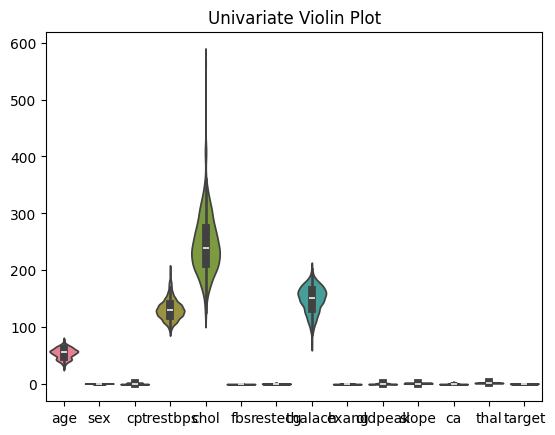

In [99]:
76890890.violinplot(data=data)
plt.title("Univariate Violin Plot")
plt.show()

<Axes: xlabel='age'>

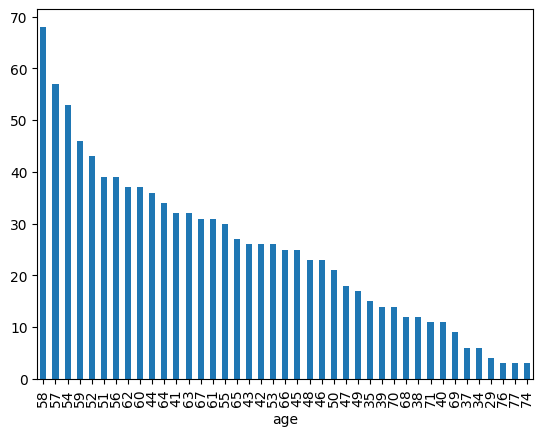

In [100]:
data["age"].value_counts().plot(kind= "bar")

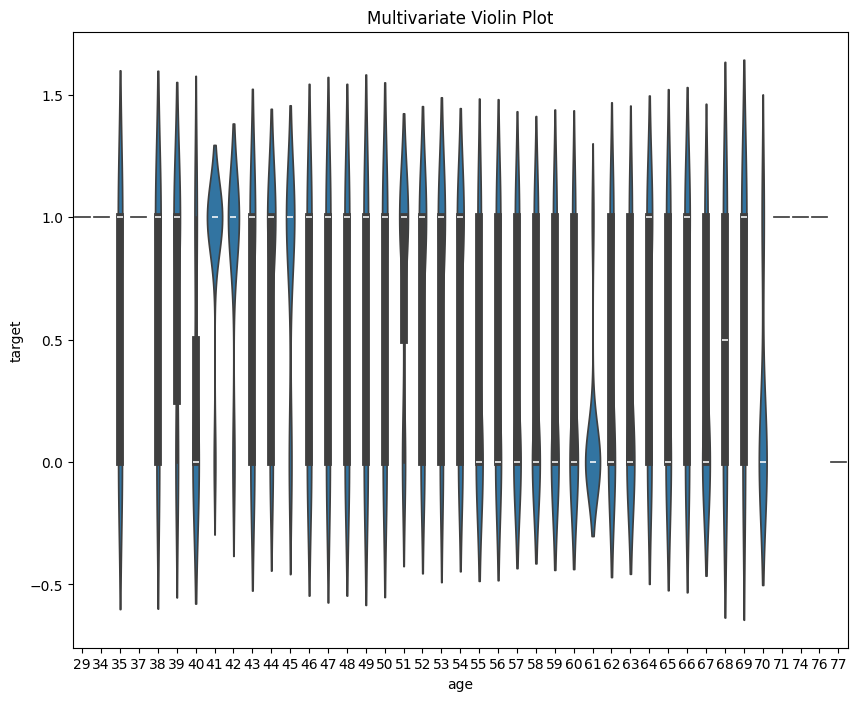

In [101]:
# Create the plot with a specified figure size
plt.figure(figsize=(10, 8))  # Width, Height in inches
sns.violinplot(x='age', y='target', data=data)
plt.title("Multivariate Violin Plot")
plt.show()

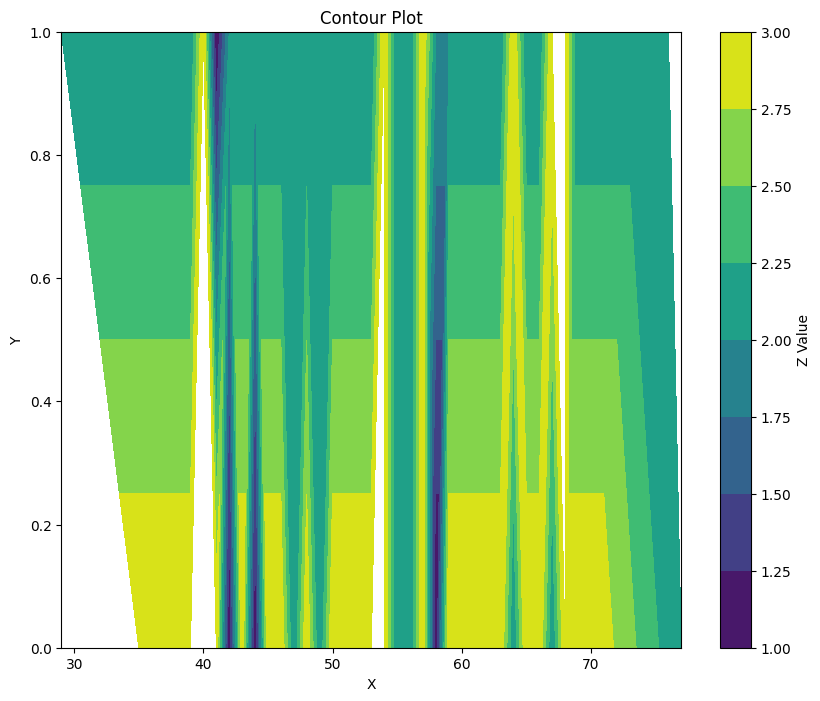

In [102]:
# Create the contour plot
plt.figure(figsize=(10, 8))
plt.tricontourf(data["age"],data["target"],data["thal"], cmap='viridis')
plt.colorbar(label='Z Value')

# Labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Contour Plot')

plt.show()

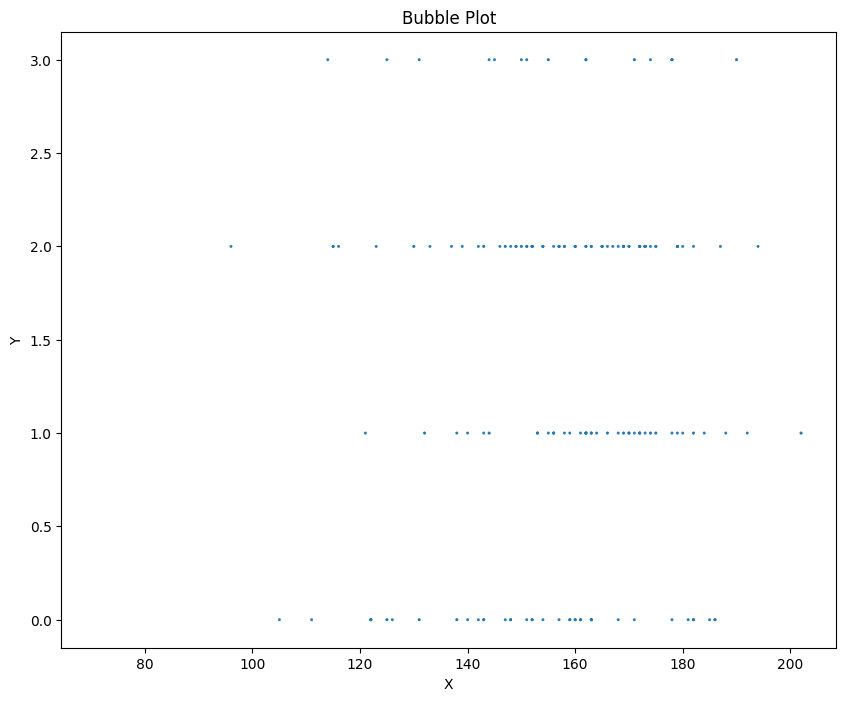

In [103]:
# Create the bubble plot
plt.figure(figsize=(10, 8))
plt.scatter(data["thalach"],data["cp"], data["target"], alpha=0.5)

# Add labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Bubble Plot')

# Show plot
plt.show()

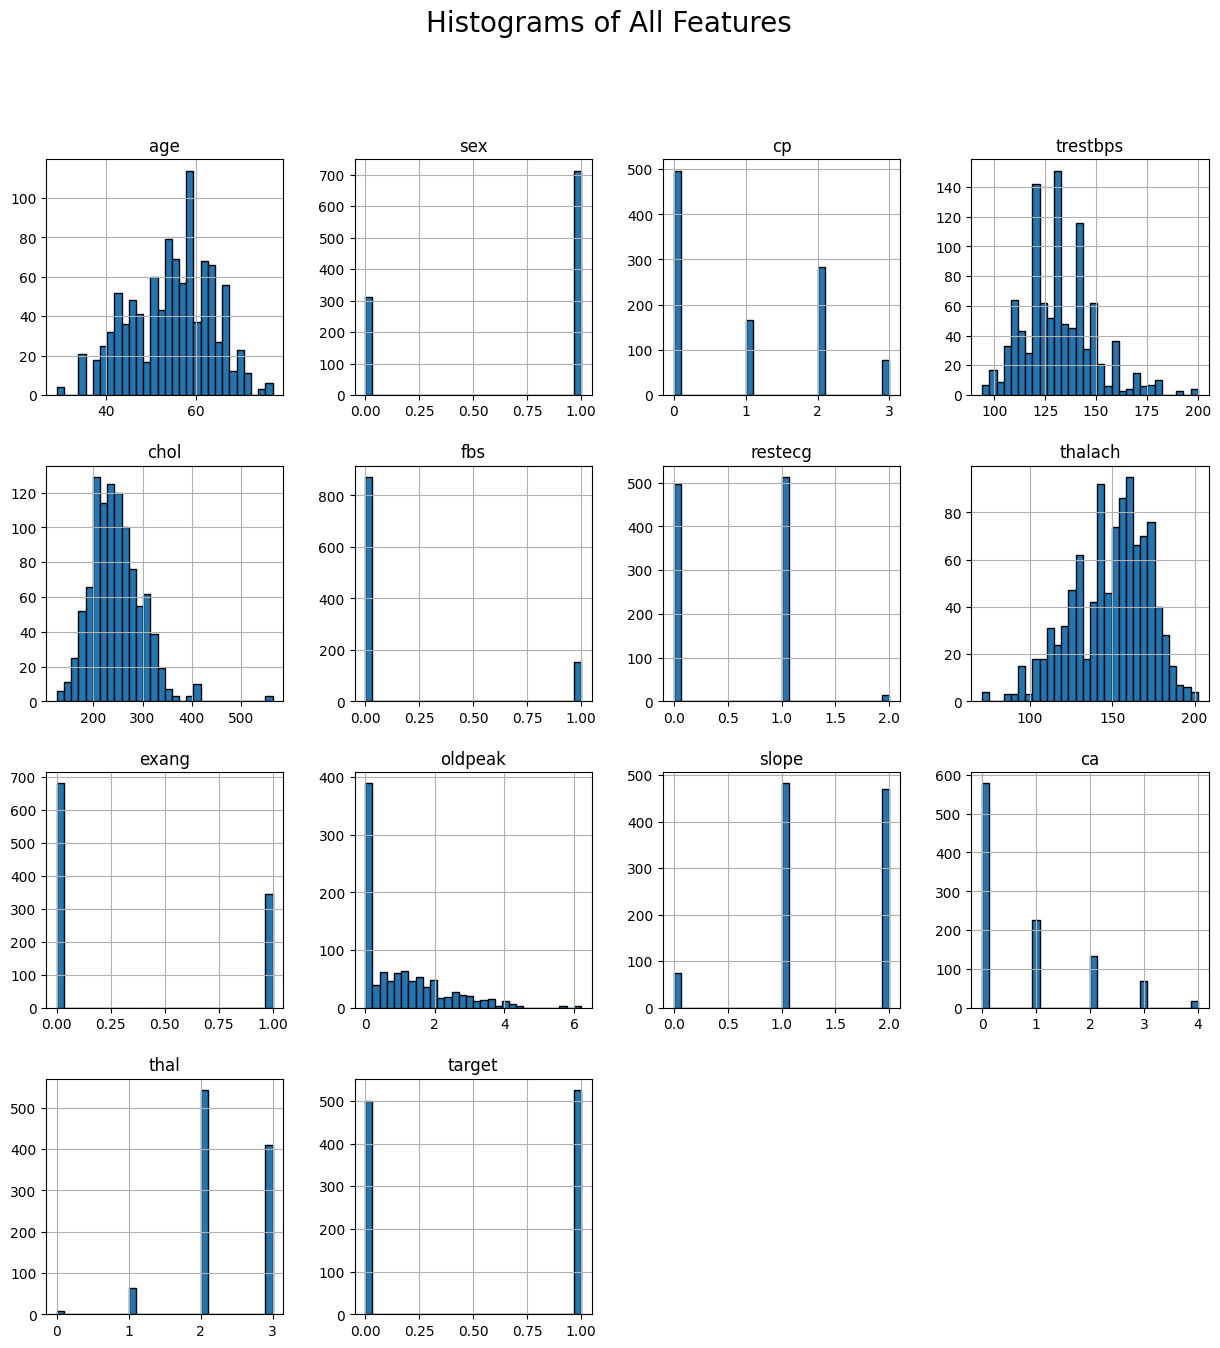

In [104]:
# Plot histograms for each feature
data.hist(figsize=(15, 15), bins=30, edgecolor='black')
plt.suptitle('Histograms of All Features', size=20)
plt.show()


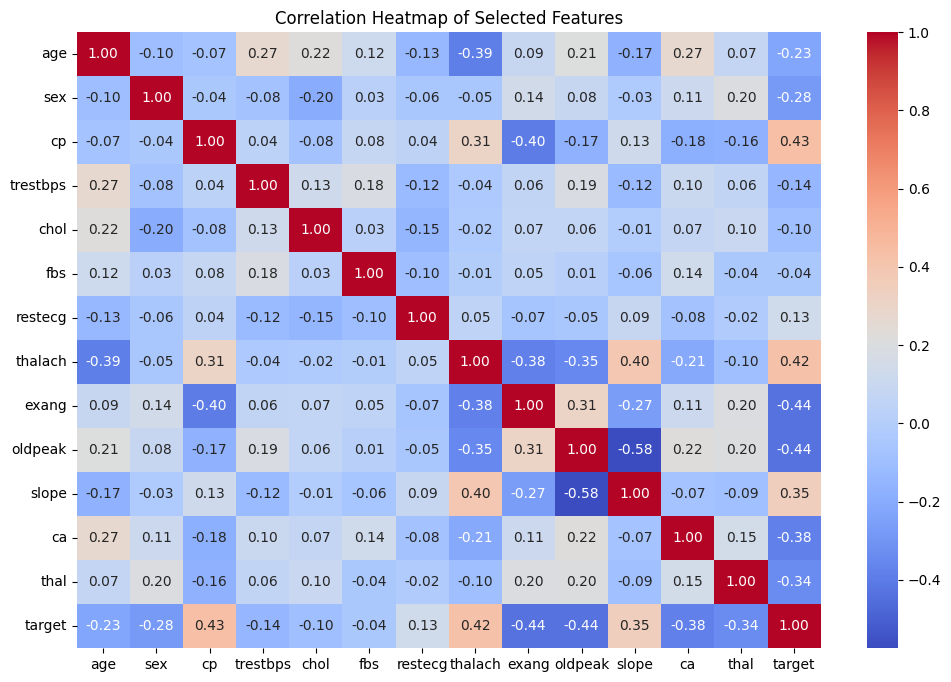

In [105]:
# Compute the correlation matrix
correlation_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Selected Features')
plt.show()

Data Splitting

In [106]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,f1_score

In [107]:
#Split data into features and target
X = data.drop(['target'], axis=1)
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [108]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(820, 13)
(820,)
(205, 13)
(205,)


In [109]:
#Enhancing Model Accuracy through Training and Hyperparameter Tuning
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [110]:
dec_tre = DecisionTreeClassifier()
dec_tre.fit(X_train, y_train)

DecisionTreeClassifier()

Model Evaluation

In [115]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Function to evaluate a model and include AUC
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)  # Predicted class labels
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

    print("Confusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    print(cm)

    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    print("Accuracy:", accuracy_score(y_test, y_pred))

    # Calculate and print AUC score
    auc = roc_auc_score(y_test, y_pred_proba)
    print("AUC Score:", auc)

    # Plot confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.show()

Evaluate Model

Logistic Regression Results:
Confusion Matrix:
[[73 29]
 [13 90]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205

Accuracy: 0.7951219512195122
AUC Score: 0.8766419189034838


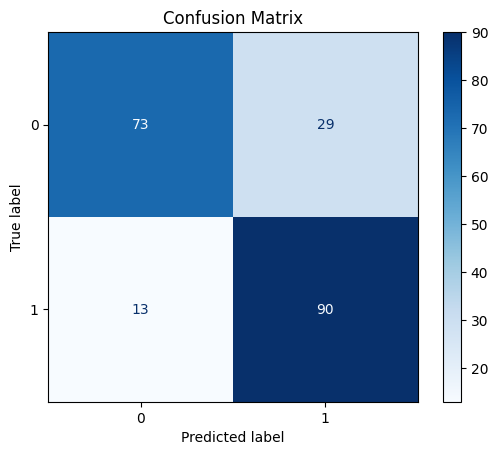

In [116]:
#For linear Regression
print("Logistic Regression Results:")
evaluate_model(log_reg, X_test, y_test)

Decision Tree Results:
Confusion Matrix:
[[102   0]
 [  3 100]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205

Accuracy: 0.9853658536585366
AUC Score: 0.9854368932038835


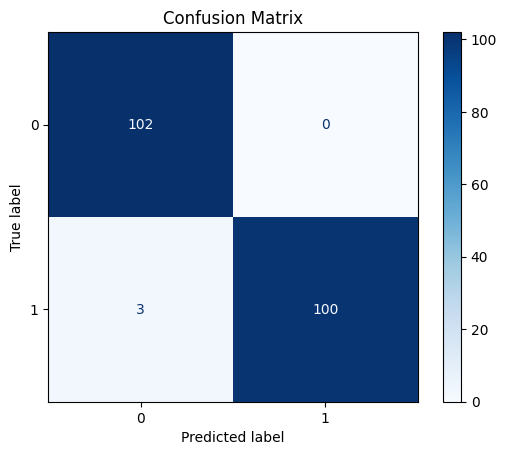

In [117]:
#For Decision Tree
print("Decision Tree Results:")
evaluate_model(dec_tre, X_test, y_test)

##Testing the Input data

In [114]:
new_input = pd.DataFrame({
    'age': [50],
    'sex': [0],
    'cp': [1],
    'trestbps': [120],
    'chol': [244],
    'fbs': [0],
    'restecg': [1],
    'thalach': [162],
    'exang': [0],
    'oldpeak': [1.1],
    'slope': [2],
    'ca': [0],
    'thal': [2]
    })


heart_disea = dec_tre.predict(new_input)

# Print the predicted survival status
print("Predicted Survival:", heart_disea)

def detection(heart_disea):
  if heart_disea == [0]:
    print("INDICATES THE ABSENCE OF HEART DISEASE")
  else:
    print("INDICATES THE PRESENCE OF HEART DISEASE")

detection(heart_disea)


Predicted Survival: [1]
INDICATES THE PRESENCE OF HEART DISEASE
